In [22]:
import pandas as pd 
import numpy as np
import itertools
import matplotlib.pyplot as plt
import networkx as nx


data = pd.read_csv("course1.txt", delimiter = ",") 
df = pd.DataFrame(data) 

courses = df['Course'].unique()
n = len(courses)
print(f"Courses:{courses} Distinct:{n}")
sem = df['Sem'].unique()
s = len(sem)
print(f"\nSem:{sem} Distinct:{s}")
c=[[[]*6]*s]*n
#here 6 is the maximum no. of subjects in each sem
students=[]

subjects={}
i=0
courses_count=[]*n

for s1,s2,s3,s4,s5,s6,c in zip(df['Sub1'],df['Sub2'],df['Sub3'],df['Sub4'],df['Sub5'],df['Sub6'],df['Course']):
    if s1 not in subjects and s1 == s1:
        subjects.update({s1:i})
        i=i+1
    elif s2 not in subjects and s2 == s2:
        subjects.update({s2:i})
        i=i+1
    elif s3 not in subjects and s3 == s3:
        subjects.update({s3:i})
        i=i+1
    elif s4 not in subjects and s4 == s4:
        subjects.update({s4:i})
        i=i+1
    elif s5 not in subjects and s5 == s5:
        subjects.update({s5:i})
        i=i+1
    elif s6 not in subjects and s6 == s6:
        subjects.update({s6:i})
        i=i+1
print("\nTotal Number of subject is:",len(subjects))


matrix = [[0 for i in range(len(subjects))] for j in range(s*n)]
#initalizing matrix
for s1,s2,s3,s4,s5,s6,sem,course in zip(df['Sub1'],df['Sub2'],df['Sub3'],df['Sub4'],df['Sub5'],df['Sub6'],df['Sem'],df['Course']):
    
    if course == 'MTech':
        sem = sem +3
        
    print(sem-1,s1)
    if s1 == s1:
        matrix[sem-1][subjects[s1]]=1
    if s2 == s2:
        matrix[sem-1][subjects[s2]]=1
    if s3 == s3:
        matrix[sem-1][subjects[s3]]=1
    if s4 == s4:
        matrix[sem-1][subjects[s4]]=1
    if s5 == s5:
        matrix[sem-1][subjects[s5]]=1
    if s6 == s6:
        matrix[sem-1][subjects[s6]]=1

        

Student_mat=pd.DataFrame(matrix, columns=subjects.keys())
print("\n\nList of Subject semester wise:")
Student_mat







Courses:['MCA' 'MTech'] Distinct:2

Sem:[1 2 3] Distinct:3

Total Number of subject is: 19
0 A
0 A
0 A
0 A
0 A
1 E
1 A
1 E
1 B
1 E
2 H
2 A
2 B
2 H
2 H
3 A
3 A
3 A
3 A
3 A
4 E
4 A
4 E
4 B
4 A
5 P
5 P
5 B
5 B
5 P


List of Subject semester wise:


,A,B,C,D,NAN,E,F,G,H,I,J,K,L,M,N,O,P,Q,R
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0
5,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,1,1


In [23]:
reverse = dict(zip(subjects.values(),subjects.keys()))
reverse

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'NAN',
 5: 'E',
 6: 'F',
 7: 'G',
 8: 'H',
 9: 'I',
 10: 'J',
 11: 'K',
 12: 'L',
 13: 'M',
 14: 'N',
 15: 'O',
 16: 'P',
 17: 'Q',
 18: 'R'}

# Course 1

Complete Graph for Subject of Sem  1 :
['A', 'B', 'C', 'D', 'NAN']


D:\Python36\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


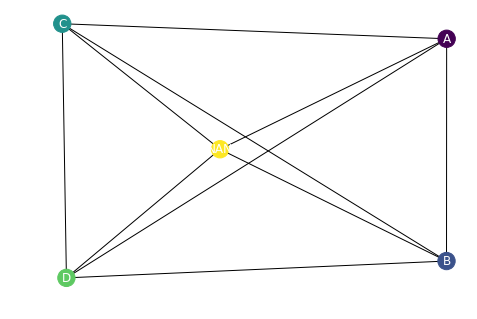

Complete Graph for Subject of Sem  2 :
['A', 'B', 'NAN', 'E', 'F', 'G', 'H']


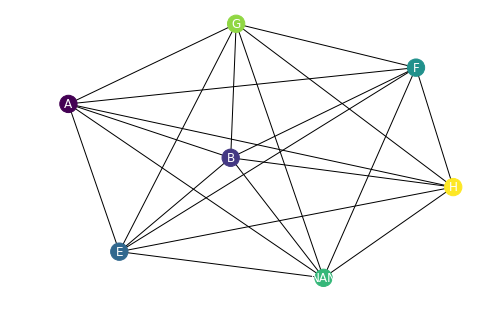

Complete Graph for Subject of Sem  3 :
['A', 'B', 'NAN', 'H', 'I', 'J', 'K', 'L']


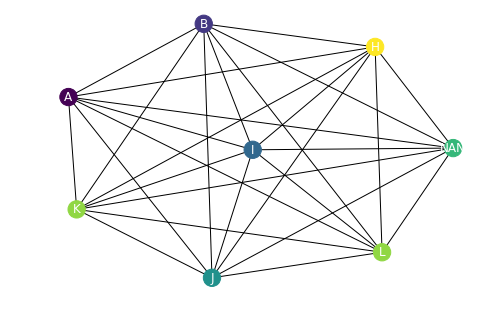

In [25]:
color_subjects={}
datesheet=[[]]
CompleteGraph = nx.Graph()
k=1
x=1
#1st chromatic no.
for i in range(0,s):
    sub=[]
    G = nx.Graph()
    for j in range(0,len(subjects)):
        if matrix[i][j]==1:
            sub.append(reverse[j]) #sem wise subject list
    datesheet.append(sub)

 #sub contains sub in each sem
    #removing colors that have been used
    chromatic=[0,1,2,3,4,5,6]
    for y in range(0,i):
        for z in range(0,len(subjects)):
            if matrix[y][z] == 1 and reverse[z] in sub and color_subjects[reverse[z]] in chromatic:
                chromatic.remove(color_subjects[reverse[z]])     
    index=0
    chromatic.append(5)
    for subject in range(0,len(sub)):
        if sub[subject] not in color_subjects.keys():
            color_subjects.update({sub[subject]:chromatic[index]})
            index=index+1
    print("Complete Graph for Subject of Sem ",(x)%4,":")
    print(sub)
    x+=1
    G.add_nodes_from(sub)
    G.add_edges_from(itertools.combinations(sub, 2))
    values = [color_subjects.get(node,0.25) for node in G.nodes()]
    CompleteGraph.add_nodes_from(sub)
    CompleteGraph.add_edges_from(itertools.combinations(sub, 2), weight =8)
    nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
    plt.show()

# Course 2

Complete Graph for Subject of Sem  1 :
['A', 'B', 'NAN', 'M', 'N']


D:\Python36\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


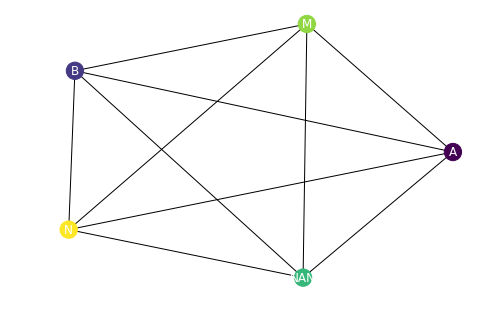

Complete Graph for Subject of Sem  2 :
['A', 'B', 'NAN', 'E', 'F', 'O', 'P']


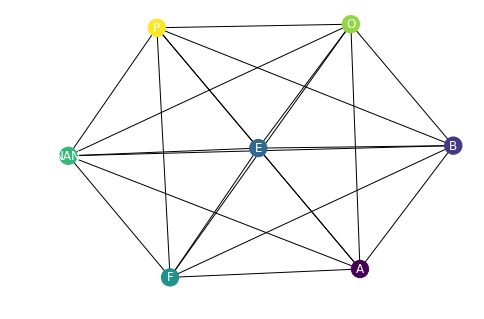

Complete Graph for Subject of Sem  3 :
['B', 'NAN', 'I', 'J', 'O', 'P', 'Q', 'R']


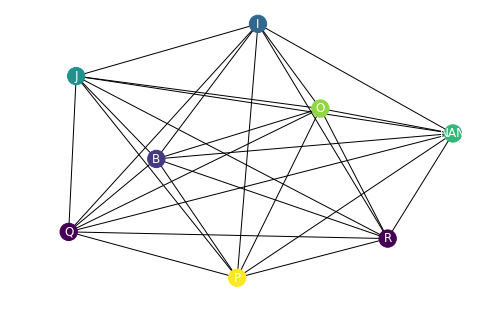

In [18]:
x=1
for i in range(s,n*s):
    sub=[]
    G = nx.Graph()
    for j in range(0,len(subjects)):
        if matrix[i][j]==1:
            sub.append(reverse[j]) #sem wise subject list
    datesheet.append(sub)
 #sub contains sub in each sem
    #removing colors that have been used
    chromatic=[0,1,2,3,4,5,6]
 
    for y in range(0,i):
        for z in range(0,len(subjects)):
            if matrix[y][z] == 1 and reverse[z] in sub and color_subjects[reverse[z]] in chromatic:
                chromatic.remove(color_subjects[reverse[z]])
   
    for y in range(i+1,s*n):
        for z in range(0,len(subjects)):
            if matrix[y][z] == 1 and reverse[z] in color_subjects.keys() and color_subjects[reverse[z]] in chromatic:
                chromatic.remove(color_subjects[reverse[z]]) 
    
    chromatic.append(5)
    index=0
    for subject in range(0,len(sub)):
        if sub[subject] not in color_subjects.keys():
            color_subjects.update({sub[subject]:chromatic[index]})
            index=index+1
    print("Complete Graph for Subject of Sem ",(x)%4,":")
    print(sub)
    x+=1
    G.add_nodes_from(sub)
    G.add_edges_from(itertools.combinations(sub, 2))
    CompleteGraph.add_nodes_from(sub)
    CompleteGraph.add_edges_from(itertools.combinations(sub, 2),weight=8)
    values = [color_subjects.get(node,0.25) for node in G.nodes()]
    nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
    plt.show()




Graph for All Subjects


D:\Python36\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


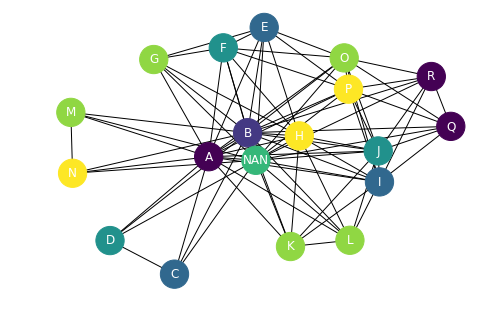

In [19]:
print("Graph for All Subjects")
values = [color_subjects.get(node,0.25) for node in CompleteGraph.nodes()]
nx.draw(CompleteGraph, node_size=800, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
nx.draw
plt.show()

In [20]:
print("Colors alloted to Each Subject")
for i,j in zip(color_subjects.keys(),color_subjects.values()):
    print(i,"-",j)

Colors alloted to Each Subject
A - 0
B - 1
C - 2
D - 3
NAN - 4
E - 2
F - 3
G - 5
H - 6
I - 2
J - 3
K - 5
L - 5
M - 5
N - 6
O - 5
P - 6
Q - 0
R - 0


In [21]:
data=np.chararray((6,9),unicode=True)
for i in range(0,n*s):
    for j in range(0,len(subjects)):
        if matrix[i][j] is 1:
            data[i][2+color_subjects[reverse[j]]]=str(reverse[j])
final = pd.DataFrame(data, columns = ['Course','Sem', 'Slot1','Slot2','Slot3','Slot4','Slot5','Slot6','Slot7'])
for i in range(0,n*s):
    if i < s:
        final.at[i,'Course']=(df['Course'].unique()[0])
    else:
        final.at[i,'Course']=(df['Course'].unique()[1])
    final.at[i,'Sem']=(df['Sem'].unique()[(i)%s])

print("\nFinal Schedule For Each Semester:")
final


Final Schedule For Each Semester:


,Course,Sem,Slot1,Slot2,Slot3,Slot4,Slot5,Slot6,Slot7
0,MCA,1,A,B,C,D,N,,
1,MCA,2,A,B,E,F,N,G,H
2,MCA,3,A,B,I,J,N,L,H
3,MTech,1,A,B,,,N,M,N
4,MTech,2,A,B,E,F,N,O,P
5,MTech,3,R,B,I,J,N,O,P
